## Analyzing the Relationship Between Song Attributes and Streaming Count

### Introduction

Music plays a significant role in my life, sparking a deep interest in understanding the factors that contribute to a song's success. This project leverages data analysis to explore the characteristics that drive song popularity across major streaming platforms. By combining my passion for music with data science, I aim to uncover insights that could be valuable for artists, producers, and music enthusiasts alike. This project aims to explore what factors affect the number of streams a song gets by using the Most Streamed Spotyfy Songs 2023, which includes bpm, danceability, positivity, instrumentalness, speechiness, along with other descriptive variables.

In [43]:
# importing libraries
import kaggle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
kaggle.api.authenticate()

# download the dataset
kaggle.api.dataset_download_files('nelgiriyewithana/top-spotify-songs-2023', path = ".", unzip = True)

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023


In [45]:
csv = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
csv.to_csv('spotify-2023-utf8.csv', encoding='utf-8', index=False)

data = pd.read_csv('spotify-2023-utf8.csv')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [46]:
# total: 953 observations and 24 columns
data.shape

(953, 24)

In [47]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Wrangling the dataset

The dataset was wrangled to fit the needs of this project. \
The selected variables are \
Explanatory variables: `bpm`, `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, and `speechiness_%`\
Response variable: `streams`

In [48]:
music = data[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',  'speechiness_%']]
music.head(3)

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,125,80,89,83,31,0,8,4
1,133716286,92,71,61,74,7,0,10,4
2,140003974,138,51,32,53,17,0,31,6


In [49]:
music.dtypes

streams               object
bpm                    int64
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
dtype: object

The `streams` column was initially of type `object`, but it was converted to a numeric type to facilitate analysis.

In [50]:
music['streams'] = pd.to_numeric(music['streams'], errors = 'coerce')

music.dtypes

C:\Users\csh03\AppData\Local\Temp\ipykernel_11640\670273691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['streams'] = pd.to_numeric(music['streams'], errors = 'coerce')


streams               float64
bpm                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
dtype: object

In [51]:
# check if there are null values
music.isnull().sum()

streams               1
bpm                   0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [52]:
# drop roww with missing values
music = music.dropna()
music.isnull().sum()

streams               0
bpm                   0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

Due to large values in the `streams` column, the data was scaled down by dividing by 1 million to improve visualization. This scaling can help make patterns in the data more visible by converting the values to a more manageable range.

In [53]:
music['streams_million'] = music['streams'] / 1e6

# reorder columns and remove the streams column
music = music[['streams_million', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',  'speechiness_%']]

music.head(3)

,log_streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,4.951463,125,80,89,83,31,0,8,4
1,4.895720,92,71,61,74,7,0,10,4
2,4.941671,138,51,32,53,17,0,31,6


### Exploratory Data Analysis

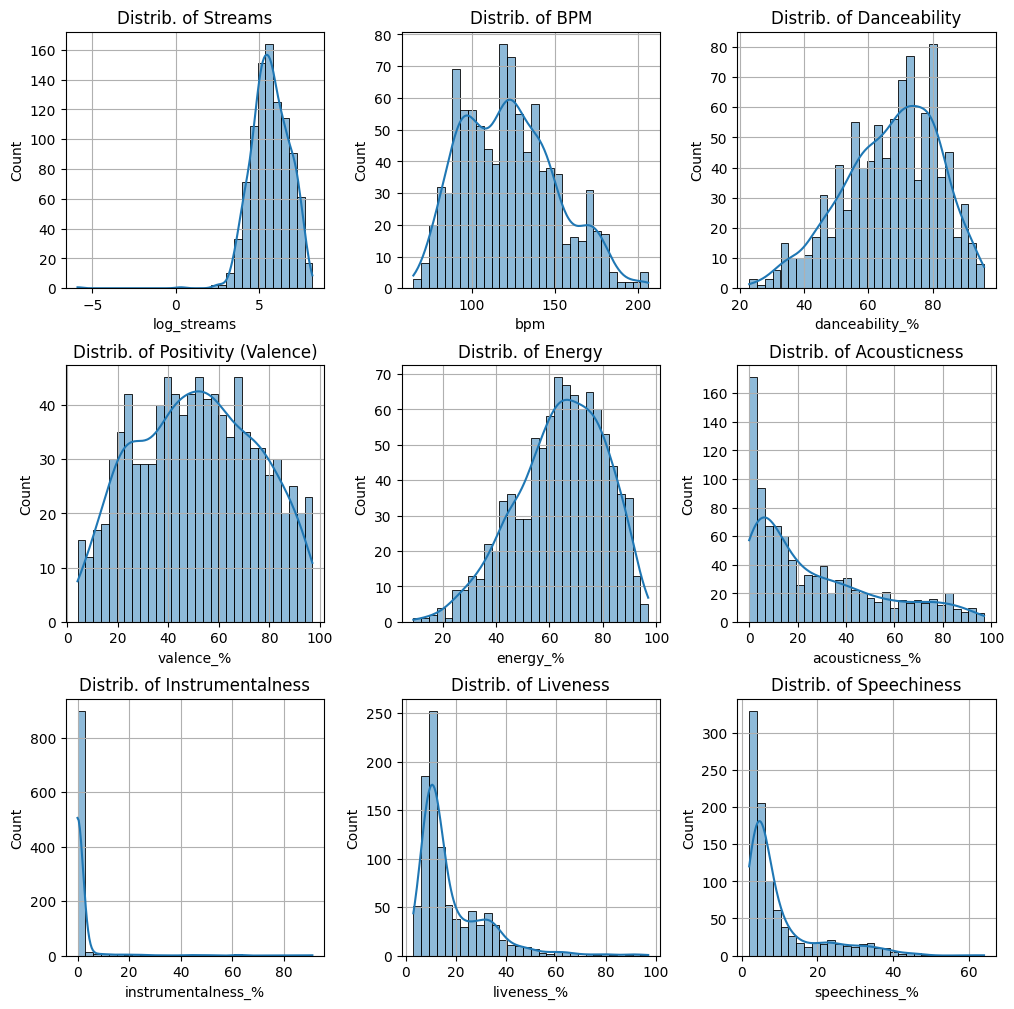

In [55]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1) # row 3, col 3, index 1
sns.histplot(music['streams_million'], bins = 30, kde=True)
plt.title('Distrib. of Streams')
plt.grid(True)


plt.subplot(3, 3, 2) # row 3, col 3, index 2
sns.histplot(music['bpm'], bins = 30, kde=True)
plt.title('Distrib. of BPM')
plt.grid(True)


plt.subplot(3, 3, 3) # row 3, col 3, index 3
sns.histplot(music['danceability_%'], bins = 30, kde=True)
plt.title('Distrib. of Danceability')
plt.grid(True)


plt.subplot(3, 3, 4) # row 3, col 3, index 4
sns.histplot(music['valence_%'], bins = 30, kde=True)
plt.title('Distrib. of Positivity (Valence)')
plt.grid(True)


plt.subplot(3, 3, 5) # row 3, col 3, index 5
sns.histplot(music['energy_%'], bins = 30, kde=True)
plt.title('Distrib. of Energy')
plt.grid(True)


plt.subplot(3, 3, 6) # row 3, col 3, index 6
sns.histplot(music['acousticness_%'], bins = 30, kde=True)
plt.title('Distrib. of Acousticness')
plt.grid(True)



plt.subplot(3, 3, 7) # row 3, col 3, index 7
sns.histplot(music['instrumentalness_%'], bins = 30, kde=True)
plt.title('Distrib. of Instrumentalness')
plt.grid(True)



plt.subplot(3, 3, 8) # row 3, col 3, index 8
sns.histplot(music['liveness_%'], bins = 30, kde=True)
plt.title('Distrib. of Liveness')
plt.grid(True)


plt.subplot(3, 3, 9) # row 3, col 3, index 9
sns.histplot(music['speechiness_%'], bins = 30, kde=True)
plt.title('Distrib. of Speechiness')
plt.grid(True)


plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


The histograms for `streams`, `acousticness`, `instrumentalness`, `liveness`, and `speechiness` show a right-skewed distrubition. `Danceability` and `energy` show a left-skewed distribution. The distribution of `valence` is bell-shaped, and the distribution of `bpm` has a binomial distribution.

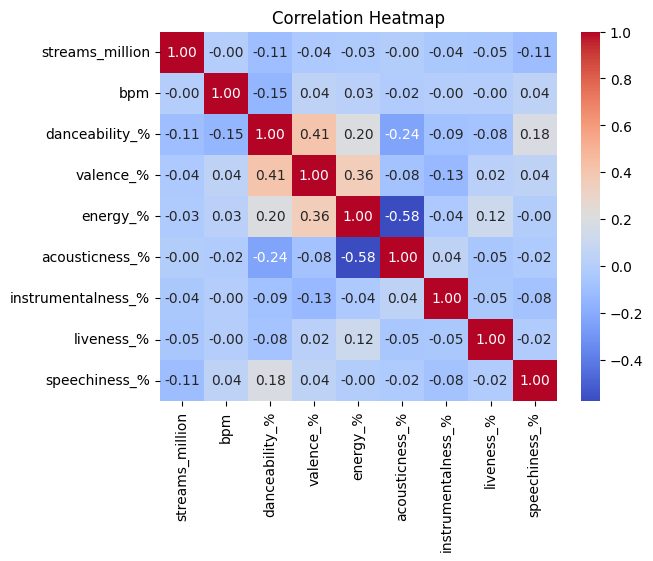

In [ ]:
correlation_matrix = music.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Examining the correlation heatmap, `valence_%` & `danceability_%`, and `energy_%` & `valence_%` show a moderate positive correlation/ On the other hand, `acousticness_%` and `energy_%` show a moedrate negative correlation. The remaining correlations exhibit either a weak negative or positive relationship, or no linear relationship.

### Model

The Lasso regression model was employed to predict the `streams_million` variable.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = music.drop(['streams_million'], axis='columns')
test = music['streams_million']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

np.float64(398.27129840317934)

In [ ]:
mean_squared_error(y_test, y_pred)

np.float64(287844.6657889295)

In [ ]:
r2_score(y_test, y_pred)

-0.003008474802335126

- Mean Absolute Error (MAE): 398.507
- Mean Squared Error (MSE): 287,855.412
- R<sup>2</sup>: -0.003

These matrics suggest that the initial model does not perform well. The MAE and MSE are relatively high, showing large errors in the predictions. The R<sup>2</sup> is negative, indicating that the model fits the data worse than a simple mean of the target variable (`streams_million`).

In [ ]:
praram_grid = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_cv = GridSearchCV(lasso, praram_grid, cv = 3, n_jobs=-1)

In [ ]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [ ]:
y_pred2 = lasso_cv.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred2)

np.float64(398.3784736175072)

In [ ]:
mean_squared_error(y_test, y_pred2)

np.float64(287694.7335757571)

In [ ]:
r2_score(y_test, y_pred2)

-0.00248602885029503

In [ ]:
lasso_cv.best_estimator_

Lasso(alpha=10)

After performing a grid search with cross-validation to tune the hyperparameter `alpha`, the model selected `alpha=1000` as the best value. However, the performance metrics after tuning are still poor. This suggests that even after tuning, the model is not able to explain the variance in the data, and the error remains high.

In [ ]:
lasso3 = Lasso(alpha=100)

In [ ]:
lasso3.fit(X_train, y_train)

Lasso(alpha=100)

In [ ]:
lasso3.intercept_

np.float64(519.7766904099099)

In [ ]:
lasso3.coef_

array([-0., -0., -0., -0.,  0., -0., -0., -0.])

In [ ]:
feature_names = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',  'speechiness_%']

In [ ]:
df = pd.DataFrame({'Feature_Names' : feature_names, 'Coef': lasso3.coef_})
df

,Feature_Names,Coef
0,bpm,-0.0
1,danceability_%,-0.0
2,valence_%,-0.0
3,energy_%,-0.0
4,acousticness_%,0.0
5,instrumentalness_%,-0.0
6,liveness_%,-0.0
7,speechiness_%,-0.0


All coefficients are negative, indicating that increases in these features associated with descreases in the predicted `streams_million`. The Lasso regression has penalized the coefficients heavily due to the high value of `alpha`, shich shrinks the coefficients towards zero to reduce model complexity and avoid overfitting.

### Conclusion

The results from the Lasso regression model indicate that the features analyzed ( `bpm`, `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, and `speechiness_%`) do not have a significant or meaningful relationship with the number of streams for the songs in this dataset. The model's poor performance, as evidenced by the negative R<sup>2</sup> score and high error metrics (MAE and MSE), suggests that these features are not good predictors of a song's streaming count.

### Implications & Limitations
This finding implies that factors such as tempo, energy, or instrumental characteristics of a song may not be the primary drivers of its popularity, at least in terms of streaming numbers. Other factors not captured in this model, such as marketing, artist popularity, or external events, might play a more significant role in determining a song's streaming success.

### Potential Future Questions
To better understand the drivers of song popularity, further research could be explored into additional features or different modeling approaches that can capture complex, non-linear relationships.